In [10]:
data_training = pd.read_csv('training_data.csv')

In [11]:
data_training.columns

Index(['Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
       'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Idn_Indicator',
       'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_es

In [12]:
data_training.shape

(2004, 51)

In [13]:
X = data_training.drop('Persistency_Flag_labels', 1)
y = data_training['Persistency_Flag_labels']

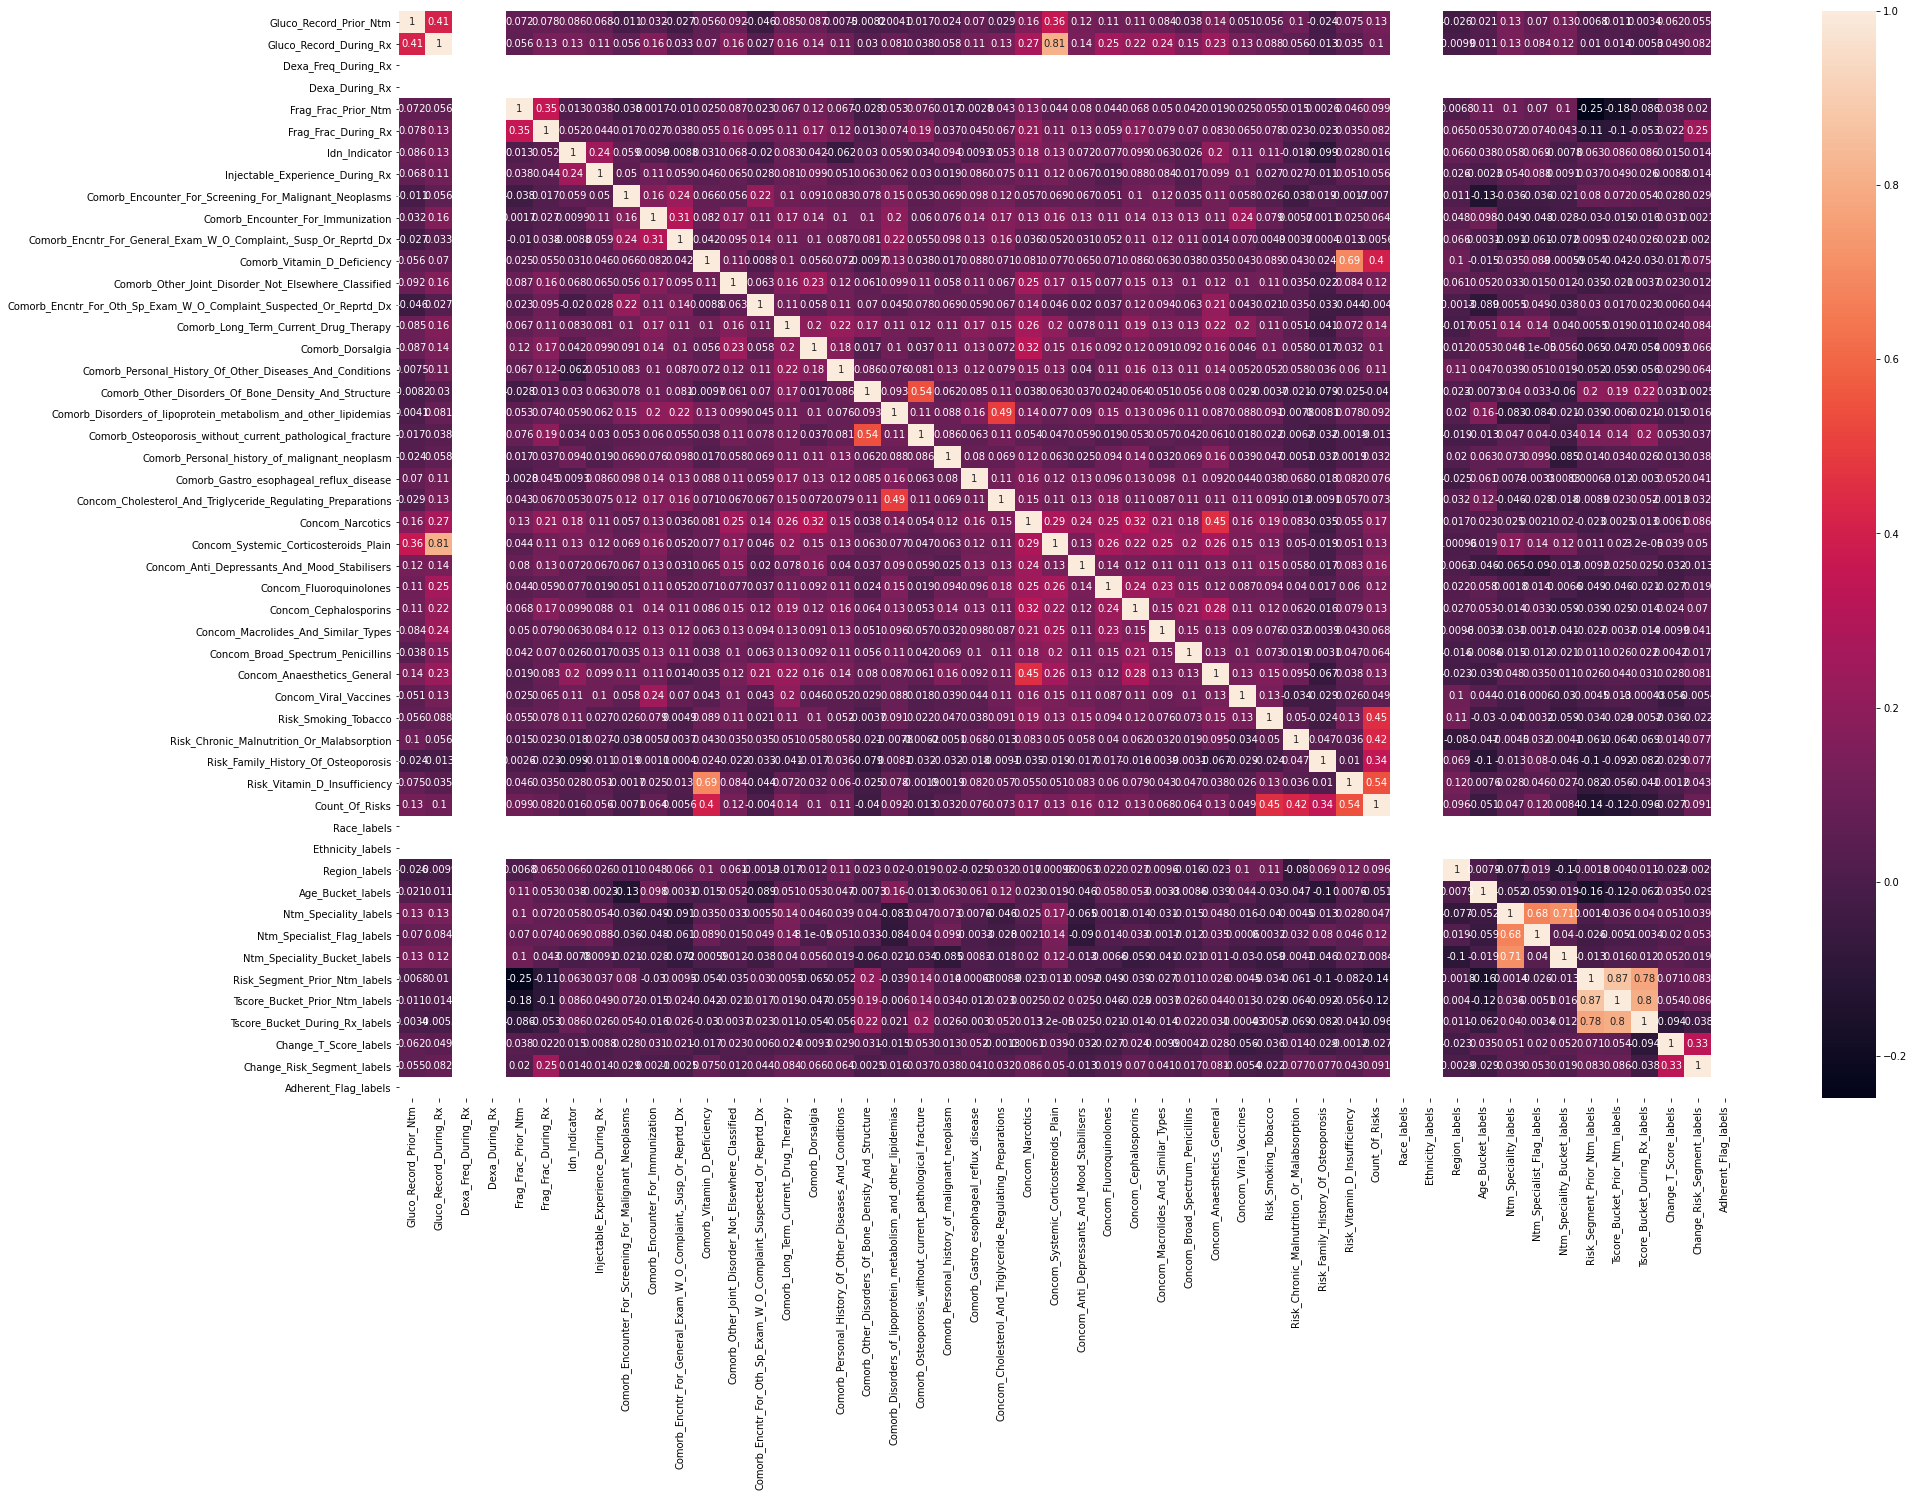

In [14]:
correlation_mat = X.corr()

fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(correlation_mat, annot = True)
plt.show()

<AxesSubplot:xlabel='Persistency_Flag_labels', ylabel='count'>

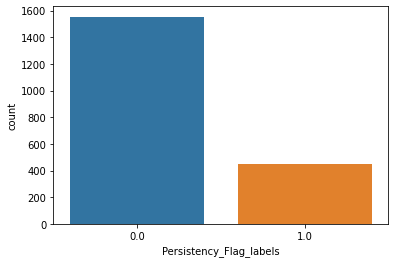

In [15]:
sns.countplot(y)

After deleting uncessary columns and outliers, the difference between target classes has become larger. We deal now with clearly imblanced data

Train with data as it is

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [17]:
X_train.shape

(1603, 50)

In [18]:
X_test.shape

(401, 50)

In [19]:
from sklearn import svm 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

C_param = 1 
svm_model = svm.SVC(C_param, "linear", probability= True) 
svm_model.fit(X_train, y_train) 
 

SVC(C=1, kernel='linear', probability=True)

In [20]:
predicted_labels_test = svm_model.predict(X_test)

In [21]:
confusion_matrix(y_test, predicted_labels_test)

array([[301,  11],
       [ 53,  36]], dtype=int64)

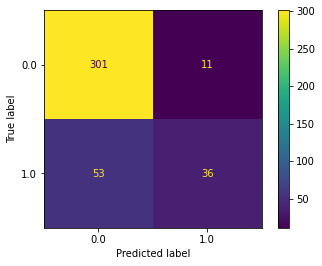

In [22]:
plot_confusion_matrix(svm_model, X_test, y_test)  
plt.show()

In [23]:
print('Classification report', classification_report(y_test,predicted_labels_test))

Classification report               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       312
         1.0       0.77      0.40      0.53        89

    accuracy                           0.84       401
   macro avg       0.81      0.68      0.72       401
weighted avg       0.83      0.84      0.82       401



 - Precision gives the percentage of the correct prediction from all values predicted positive.
    P= TP/(TP+FP)
 - Recall measure the percentage of the correct prediction from all values that were actually positive. 
    R= TP/(TP+FN)
 - F1 score weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
     F1 score= 2*(R*P)/(R+P)
 - Support is the number of actual occurrences of the class in the specified dataset.

In [24]:
svm_model.predict_proba(X_test)


array([[0.66709792, 0.33290208],
       [0.76041513, 0.23958487],
       [0.83823133, 0.16176867],
       [0.88889381, 0.11110619],
       [0.8460194 , 0.1539806 ],
       [0.96104879, 0.03895121],
       [0.89044987, 0.10955013],
       [0.92618478, 0.07381522],
       [0.79563557, 0.20436443],
       [0.47215499, 0.52784501],
       [0.82297441, 0.17702559],
       [0.8488133 , 0.1511867 ],
       [0.42396585, 0.57603415],
       [0.56852795, 0.43147205],
       [0.90915747, 0.09084253],
       [0.7662038 , 0.2337962 ],
       [0.4151929 , 0.5848071 ],
       [0.3532042 , 0.6467958 ],
       [0.91098453, 0.08901547],
       [0.83045376, 0.16954624],
       [0.92942497, 0.07057503],
       [0.72897671, 0.27102329],
       [0.923068  , 0.076932  ],
       [0.83925522, 0.16074478],
       [0.9396742 , 0.0603258 ],
       [0.11714183, 0.88285817],
       [0.91633595, 0.08366405],
       [0.92643291, 0.07356709],
       [0.9253725 , 0.0746275 ],
       [0.96314185, 0.03685815],
       [0.

[0.17989728, 0.82010272] -> clearly the second class

[0.96589305, 0.03410695] -> clearlt the first class

The Probability is not random one. Considering the imbalacing condition, this is a very good result.

In [25]:
print('ROC AUC score on test data', roc_auc_score(y_test,svm_model.predict_proba(X_test)[:, 1] ))

print('ROC AUC score on the entire dataset', roc_auc_score(y, svm_model.decision_function(X)))

ROC AUC score on test data 0.8340535868625757
ROC AUC score on the entire dataset 0.838195338195338


Apply PCA dimensionality reduction and train again

Apply PCA on the whole dataset

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=50)
pca.fit(X)
X_pca = pca.transform(X)

Show what number of components has the best variance

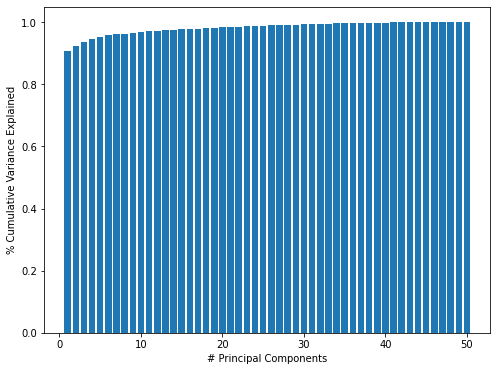

In [27]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,51), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

From this graph we can see that the variance is improving with the number of fetures. The best variance is reahed when having all features. The dimensonality reduction is not suitable in this case.

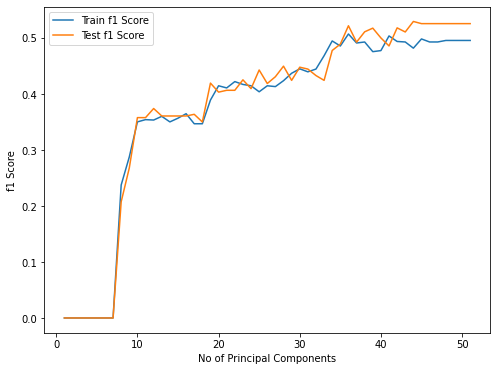

In [28]:
from sklearn.metrics import f1_score

train_f1 = []
test_f1 = []

C_param = 1 
svm_model = svm.SVC(C_param, "linear", probability= True)

for i in range(51):
    
    X = X_pca[:,0:i+1]
    
    #split dataset on which we have applied PCA
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=30)
    #normalise features
    sc = StandardScaler()
    X_train_pca = sc.fit_transform(X_train_pca)
    X_test_pca = sc.transform(X_test_pca)

    svm_model.fit(X_train_pca, y_train_pca) 

    y_pred_train = svm_model.predict(X_train_pca)
    y_pred_test = svm_model.predict(X_test_pca)
    train_f1.append(f1_score(y_train, y_pred_train))
    test_f1.append(f1_score(y_test, y_pred_test))

# Plot accuracy by n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(range(1,52), train_f1, label='Train f1 Score')
plt.plot(range(1,52), test_f1, label='Test f1 Score')
plt.ylabel('f1 Score')
plt.xlabel('No of Principal Components')
plt.legend()
plt.show()

The best F1 score is reached with all 50 features. We need all features to get a good result. 

In [29]:
#see that with fewest features, the results are worsen (change number of feture taken from X_pca)
X = X_pca[:,0:52]

   
#split dataset on which we have applied PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=30)
#normalise features
sc = StandardScaler()
X_train_pca = sc.fit_transform(X_train_pca)
X_test_pca = sc.transform(X_test_pca)

svm_model.fit(X_train_pca, y_train_pca) 

y_pred_train = svm_model.predict(X_train_pca)
y_pred_test = svm_model.predict(X_test_pca)
    
print(f'Train f1 Score: {f1_score(y_train_pca, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test_pca, y_pred_test)}')
print(classification_report(y_test_pca, y_pred_test))

Train f1 Score: 0.4955116696588868
Test f1 Score: 0.5255474452554744
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       312
         1.0       0.75      0.40      0.53        89

    accuracy                           0.84       401
   macro avg       0.80      0.68      0.71       401
weighted avg       0.83      0.84      0.82       401



In [30]:
import pickle
filename = 'svm_model.pkl'
pickle.dump(svm_model, open(filename, 'wb'))

In [133]:
confusion_matrix(y_test_pca, y_pred_test)

array([[300,  12],
       [ 53,  36]], dtype=int64)

In [134]:
print('ROC AUC score on test data', roc_auc_score(y_test_pca,svm_model.predict_proba(X_test_pca)[:, 1] ))

print('ROC AUC score on the entire dataset', roc_auc_score(y, svm_model.decision_function(X)))

ROC AUC score on test data 0.8343056755978105
ROC AUC score on the entire dataset 0.8144144144144143


Upsampling

In [135]:
data_training = pd.read_csv('data_training.csv')

In [136]:
data_training['Persistency_Flag_labels'].value_counts()

0.0    1554
1.0     450
Name: Persistency_Flag_labels, dtype: int64

In [137]:
from sklearn.utils import resample

data_when_false = data_training[data_training['Persistency_Flag_labels']==0]
data_when_true = data_training[data_training['Persistency_Flag_labels']==1]

data_when_false_upsampled = resample(data_when_true,
                          replace=True, 
                          n_samples=len(data_when_false), 
                          random_state=27)

upsampled = pd.concat([data_when_false, data_when_false_upsampled])

upsampled['Persistency_Flag_labels'].value_counts()

0.0    1554
1.0    1554
Name: Persistency_Flag_labels, dtype: int64

In [138]:
X = upsampled.drop('Persistency_Flag_labels', 1)
y = upsampled['Persistency_Flag_labels']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [140]:
X_train.shape

(2486, 50)

In [141]:
X_test.shape

(622, 50)

In [142]:
C_param = 1 
svm_model = svm.SVC(C_param, "linear", probability= True) 
svm_model.fit(X_train, y_train) 

SVC(C=1, kernel='linear', probability=True)

In [143]:
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)
    
print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))

Train f1 Score: 0.7771850636027903
Test f1 Score: 0.7819314641744548
              precision    recall  f1-score   support

         0.0       0.78      0.75      0.77       307
         1.0       0.77      0.80      0.78       315

    accuracy                           0.77       622
   macro avg       0.78      0.77      0.77       622
weighted avg       0.78      0.77      0.77       622



In [144]:
confusion_matrix(y_test, y_pred_test)

array([[231,  76],
       [ 64, 251]], dtype=int64)

In [145]:
print('ROC AUC score on test data', roc_auc_score(y_test,svm_model.predict_proba(X_test)[:, 1] ))

print('ROC AUC score on the entire dataset', roc_auc_score(y, svm_model.decision_function(X)))

ROC AUC score on test data 0.8349154645571584
ROC AUC score on the entire dataset 0.8453093192475432


The accuracy is even lower. By upsampling the true classes is not a solution to improvement.

Downsampling

In [146]:
data_when_false_downsampled = resample(data_when_false,
                          replace=True, 
                          n_samples=len(data_when_true), 
                          random_state=27)

downsampled = pd.concat([data_when_true, data_when_false_downsampled])

downsampled['Persistency_Flag_labels'].value_counts()

0.0    450
1.0    450
Name: Persistency_Flag_labels, dtype: int64

In [147]:
X = downsampled.drop('Persistency_Flag_labels', 1)
y = downsampled['Persistency_Flag_labels']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [149]:
X_train.shape

(720, 50)

In [150]:
X_test.shape

(180, 50)

In [151]:
C_param = 1 
svm_model = svm.SVC(C_param, "linear", probability= True) 
svm_model.fit(X_train, y_train) 

SVC(C=1, kernel='linear', probability=True)

In [152]:
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)
    
print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))

Train f1 Score: 0.7513812154696132
Test f1 Score: 0.7764705882352941
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80        96
         1.0       0.77      0.79      0.78        84

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180



In [153]:
confusion_matrix(y_test, y_pred_test)

array([[76, 20],
       [18, 66]], dtype=int64)

In [154]:
print('ROC AUC score on test data', roc_auc_score(y_test,svm_model.predict_proba(X_test)[:, 1] ))

print('ROC AUC score on the entire dataset', roc_auc_score(y, svm_model.decision_function(X)))

ROC AUC score on test data 0.8550347222222221
ROC AUC score on the entire dataset 0.8365382716049383


The results are even worst.

Conclusions

 - In terms of accuracy, removing outliers does not influence so much model training, but it definitely speeds it up, especially if we are dealing with large datasets.
 
 - 50 features is the ideal number in order to get best results using SVM classifier.

 - There is no need for dimensionality reductin as smaller fetures lead to worsen results.

 - Altough the target classes are imbalanced, by applying upsampling and downsampling in order to reprodiuce the same number of target classes data, the results are getting worst.